In [1]:
import pandas as pd
import numpy as np
import shap as shap

In [6]:
import json
a=json.dumps({"a":1})

In [7]:
json.loads(a)

{'a': 1}

In [2]:
df=pd.read_csv("adult.csv",encoding='latin-1')
df[df == '?'] = np.nan
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
X = df.drop(['income'], axis=1)
y = df['income']

In [3]:
filenames=['models/clf136.ptl',
 'models/clf93.ptl',
 'models/clf90.ptl',
 'models/clf133.ptl',
 'models/clf97.ptl']
url=["static/1681784002.526944net.pt","static/1681784119.9099834clf136.ptl","static/1681784142.0146716clf93.ptl","static/1681784163.633804clf90.ptl","static/1681784185.649614clf133.ptl","static/1681784199.7517712clf97.ptl","static/1681786345.2919972X_train.pickle"]

In [4]:
from numpy import int64
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [5]:
X_test

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
14160,29,Private,280618,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States
27048,19,Private,439779,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,15,United-States
28868,28,Private,204734,Some-college,10,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,40,United-States
5667,35,Private,107991,11th,7,Never-married,Sales,Not-in-family,White,Male,0,0,45,United-States
7827,20,Private,54152,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32476,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,United-States
21100,55,Self-emp-not-inc,98361,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,35,United-States
27131,35,State-gov,154410,Some-college,10,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States
25526,60,Private,232337,7th-8th,4,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States


In [23]:
import pickle
with open("X_test.pickle","wb") as f:
    pickle.dump(X_test[60:61],f)

In [7]:
from getSingleData import Income
a=Income(filenames=["static/1681784119.9099834clf136.ptl","static/1681784142.0146716clf93.ptl","static/1681784163.633804clf90.ptl","static/1681784185.649614clf133.ptl","static/1681784199.7517712clf97.ptl"],net_path="static/1681784002.526944net.pt")

['static/1681784119.9099834clf136.ptl', 'static/1681784142.0146716clf93.ptl', 'static/1681784163.633804clf90.ptl', 'static/1681784185.649614clf133.ptl', 'static/1681784199.7517712clf97.ptl']


In [15]:
exp=a.explain(X_test[:1],method=6)

In [16]:
exp.shape

(1, 14)

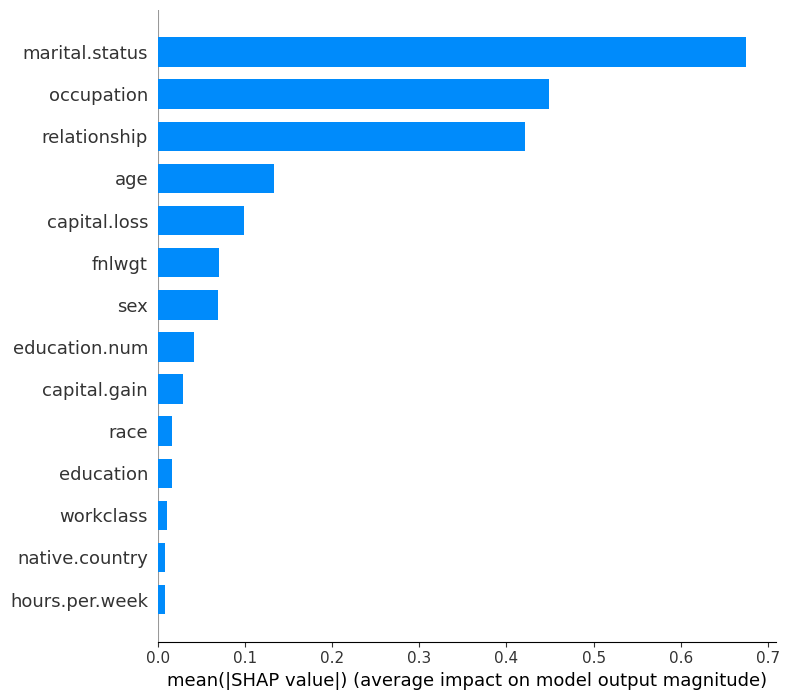

In [32]:

import time
from matplotlib import pyplot as plt

fig=shap.summary_plot(exp,X_test[:1],plot_type='bar',show=False)
plt.savefig(str(time.time())+"exp.png")

In [8]:
a.eval_exp(X=X_test[1:2])

0.13356596265687176

In [20]:
from numpy import int64
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

y_train[y_train=="<=50K"]=0
y_train[y_train==">50K"]=1
y_test[y_test=="<=50K"]=0
y_test[y_test==">50K"]=1
y_train=y_train.astype(int64)
y_test=y_test.astype(int64)

In [5]:
import pickle
with open("X_train.pickle","wb")as f:
    pickle.dump(X_train[:1],f)

In [6]:
from io import BytesIO
with open("X_train.pickle","rb")as f:
    buf = BytesIO(f.read())
    f.close()
    model=pickle.load(buf)

In [9]:
from torch import nn
import torch
from torch.utils.data import Dataset


class MyDataSet(Dataset):
    def __init__(self,data_x,data_y):
        self.x=torch.tensor(data_x).to(torch.float)
        self.y=torch.tensor(data_y).to(torch.float)
        # print(self.x.shape,self.y.shape)
    def __getitem__(self, item):
        return self.x[item],self.y[item],item
    def __len__(self):
        return len(self.x)
class MyNetWork(nn.Module):
    def __init__(self):
        super(MyNetWork,self).__init__()
        self.fc1=nn.Linear(5,1)
        # self.fc2=nn.Linear(2,1)
    def forward(self,x):
        x=self.fc1(x)
        # x=self.fc2(x)
        return x

In [10]:
import shap

masker = shap.maskers.Independent(X_train)
pmasker = shap.maskers.Partition(X_train)

In [11]:
from shap import benchmark

In [12]:
from io import BytesIO
import pickle
with open(filenames[0],'rb') as f:
    buf = BytesIO(f.read())
    f.close()
    loaded_model = pickle.load(buf)

In [122]:
from scipy import stats
def logit_predict(X):
    ys=[]
    for file_path in filenames:
        loaded_model = pickle.load(open(file_path, 'rb'))
        ys.append(loaded_model.predict(X))
    ans=np.array(ys)
    return np.array(pd.DataFrame(ans).mode()).squeeze()
def logit_predict2(X):
    return loaded_model.predict(X)

In [123]:
logit_predict(X_train[:100])==logit_predict2(X_train[:100])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [124]:
def explain_mean(X):
    ys=[]
    for file_path in filenames:
        loaded_model = pickle.load(open(file_path, 'rb'))
        explainer = shap.explainers.Tree(loaded_model, masker)
        ys.append(explainer(X).values)
    return np.mean(ys,axis=0)


In [125]:
net=MyNetWork()
net.load_state_dict(torch.load("./adult/net.pt"))
def explain(X):
    ys=[]
    for file_path in filenames:
        loaded_model = pickle.load(open(file_path, 'rb'))
        explainer = shap.explainers.Tree(loaded_model, masker)
        ys.append(explainer(X).values)
    return np.array(net(torch.tensor(np.array(ys).transpose([1,2,0])).to(torch.float)).squeeze(dim=0).transpose(1,0).detach().numpy())


In [126]:

smasker = shap.benchmark.SequentialMasker(
        "keep", "positive", masker, logit_predict, np.array(X_train[:1])
    )
explainer = shap.explainers.Tree(loaded_model, masker)
exp=explainer(X_train[:1]).values
smasker(exp,name="Tree").value

0.13856443220079578

In [40]:
import pickle
import quantus
device="cpu"
shaps=[]
for file_path in filenames[1:2]:
    loaded_model = pickle.load(open(file_path, 'rb'))
    # pre=loaded_model.predict(X_train[0:1])[0]
    explainer = shap.explainers.Tree(loaded_model, masker)
    # shap_values = explainer.shap_values(X=X_train[0:1])
    # shaps.append(shap_values[pre])
    def logit_predict(X):
        return loaded_model.predict(X)
    smasker = shap.benchmark.SequentialMasker(
        "keep", "positive", masker, logit_predict, np.array(X_train[:1])
    )
    exp=explainer(X_train[0:1]).values
    res=smasker(exp,name="Tree")#或许可以手动输入解释
    print(res.value)

0.11142230384654629


array([[ 0.7970222 ,  0.00241278, -0.05928995, -0.00102832, -0.27767637,
         0.6656965 ,  0.01621427,  0.41309777,  0.01792634,  0.09990667,
        -0.02218851, -0.09527703,  0.031206  ,  0.02039415]],
      dtype=float32)

0.14713498622589533

(1, 14)


0.11142230384654629

array([[ 0.74621852, -0.00163671, -0.03717308, -0.00099482, -0.30193335,
         0.70569045,  0.07724382,  0.44000543,  0.01160138,  0.11324939,
        -0.03816842, -0.06921843,  0.07746292,  0.03260783]])

In [154]:
np.mean(np.array([exp.values, explainer.shap_values(X_train[:1])]),axis=0)

array([[ 0.74621852, -0.00163671, -0.03717308, -0.00099482, -0.30193335,
         0.70569045,  0.07724382,  0.44000543,  0.01160138,  0.11324939,
        -0.03816842, -0.06921843,  0.07746292,  0.03260783]])

<All keys matched successfully>

tensor([[[-0.9090],
         [-0.0096],
         [ 0.0749],
         [ 0.0037],
         [ 0.3555],
         [-0.8212],
         [ 0.0175],
         [-0.5343],
         [-0.0334],
         [-0.1121],
         [ 0.2694],
         [ 0.0715],
         [-0.0166],
         [-0.0149]]], grad_fn=<AddBackward0>)